#  Explain your understanding (based on the documentation/paper) of the mechanisms you chose.

- GGNN : means Gated Graph Neural Networks , Neural Networks with Gated Graphs (GG-NNs) Unroll recurrence for a defined number of steps and utilise contemporary optimization approaches to backpropagate across time.

- RGCN : (Graph convolution layers) Compute new graph states by neural message passing , The concept of Graph Convolutional Networks is extended by Relational Graph Convolutional Networks (RGCN). A GCN's layers are a generalisation of convolutional layers in a CNN, where the data can have a dynamic number of neighbours rather than being set on a grid like pixels in a picture. RGCN expands GCNs to operate on multigraphs, where there are several edge types, where GraphSAGE focuses on extending GCNs to generalise by employing trainable aggregation functions. GCN layers come in a variety of shapes and sizes, with more being introduced all the

- GNN-Edge-MLP :  Graph Neural Network with Edge MLPs - RGCN variation in which messages on edges are generated using entire MLPs rather than simply a single layer applied to the source state.

- RGAT : Relational Graph Attention Networks Compute new graph states using attention and neural message passing.

- RGIN: (Message propagation layer of the Relation Graph Isomorphism Network) Use MLPs for state updates and message computation to compute new graph states using neural message forwarding.






#  What is the experimental protocol used and how was it carried out?

- The first step is to read the sdf file to obtain information about the atoms in the molecule and their connectivity. The atoms are called nodes, and the connections are called edges. The read sdf method is used to read the chemical composition of the compound from a sdf file.

- Characters (such as ['O','N']) are used to represent nodes (atoms). As a result, it's viewed as a sequence of text data, with the best method to characterise it being to tokenize the data before adding the embeddig layer.

- the probability of the output class is calculated using a graph convolutional network. Message passing methods are implemented differently in different approaches, such as:

- GGNN : means Gated Graph Neural Networks 

- RGCN : (Graph convolution layers) 

- GNN-Edge-MLP : Graph Neural Network with Edge MLPs

- RGAT : Relational Graph Attention Networks 

- RGIN: Message propagation layer of the Relation Graph Isomorphism Network

# How did we tune hyper-parameters in the template?

Manually by trying different values for the following hyperparameters:

"hidden_dim" : size of the output of all message passing layers.

"message_calculation_class" : message passing style

"num_layers" : number of GNN message passing layers

"num_heads" : number of parallel (independent) weighted sums



# What is the search space and what is the criteria to determine good/bad hyper-parameters?

In this problem I used the Manua search 

Search space. This component describes the set of possible neural network architectures to consider. These search spaces are designed specific to the application, e.g., a space of convolutional networks for computer vision tasks or a space of recurrent networks for language modeling tasks.

There are basically four methods to determine hyperparameters:

Manual Search: Using knowledge you have about the problem guess parameters and observe the result. 


Grid Search:Determine ranges for the hyperparameters based on your knowledge of the problem. Then choose a few points from those ranges that are usually evenly distributed. Train your network with every possible parameter combination and pick the one that works best. Alternatively, you can refine your search to a more specific domain centred on the best-performing characteristics.


Random Search:To identify ranges for the hyperparameters, you leverage knowledge of the problem in the same way that grid search does. Instead of selecting values from such ranges in a systematic manner, you choose them at random. Use what you learn to reduce your search or repeat this procedure until you find settings that work well. Dr. Bengio suggests this as the baseline approach against which all other methods should be assessed in his paper Random Search for Hyper-Parameter Optimization, and shows that it works better than the others.

Bayesian Optimization:More recent work has focused on improving on these other approaches by deciding how to alter the hyper parameters for the next experiment based on the knowledge acquired from any specific experiment. Adams et alPractical .'s Bayesian Optimization of Machine Learning Algorithms is an example of this type of work.

# Input 

Graph data in which each chemical compound is represented as a graph, with atoms acting as nodes and bonds acting as edges.




# output

The output is a prediction of a chemical compound's activity based on the chemical structure of the compund, predictions can be  positive or negative in terms of cancer cell resistance, and our classes are 0 as negative or 1 as positive


# What data mining function is required?

Tokenization when it comes to preprocessing in order to tokenize the data before adding the embeddig layer.

# What could be the challenges? 

Developing a successful solution to our problem , complex data,datasets can include complex data elements ,another thing is that we have to make sure that our algorithm must be efficient and scalable to extract information from the big data and we should have enough knowledge and experience in order to use them if we needed to improve our algorithms.



# What is the impact? 

It will make a great impact when it comes to medical field as it is going to predict wether chemical compunds are positive or negative in terms of lung cancer resistence

# What is an ideal solution?

 An ideal solution in my opinion will be measured in terms of metrics and performances


# Based on the provided template, describe the format of the input file (sdf file)

SDF stands for data file structure , the file has data about chemicals compounds , every molecule has a section with its name, connections or bonds, version num.. etc .

We used those to get information about the compound and saving them as edges and nodes. Each node is the atom given in the chemical molecule.

# What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?

- node2graph, contains information about segmented ids and is used for segmented mean.Each batch has the shape (batch size*max len nodes)


- edge: edge is the input tensor which carries information about connections between atoms. its shape is [sum_of_all_edges,2]

- data: The data has the tokenized nodes of the chemical molecule.after being tokeized, nodes get padded with the pad sequence function. [batch size*max len nodes] is the shape of each batch.


# For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?

- gnn_out: The gnn_out is of shape [batch_size_node_dimension,hidden layers], the batch_size_node_dimension is the (dimension of tokenized vector for the complete batch.For each hidden layer, it reflects the model's aggregate output.

- using avg,The segmented mean of the gnn out is calculated, The average tensor's final output is of the shape [batch size, hidden layer]. 



# What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?.

segment_mean calculates the average of data with the same segmented ids.

 while tf.reduce_mean when given parameters, computes the mean of elements across dimensions of a tensor.


[batch size,1] is the shape of pred. the final output for each sample is a number that indicates the probability associated with each chemical compound's activity (0 or 1).

# What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?

4 layers were used in this template, Using numerous gcn aids in effectively capturing all graph complexity, resulting in a better model.

In [45]:
#importing some of  libraries I will need
import numpy as np
from tqdm.notebook import tqdm
#our files are in sdf ,
#The Spatial Data File (SDF) is a single-user geodatabase file format developed by Autodesk.
# The file format is the native spatial data storage format for Autodesk GIS programs MapGuide and AutoCAD Map 3D. 
#The boundaries between molecules are defined by $$$$
#the atom block lines start with '    ' and have atoms information
#bond block starts with ' ' and contains info about atoms' conection
def read_sdf(file): #function for reading files
    with open(file, 'r') as rf: #opening file to read what's in it
        content = rf.read() #applying read( ) fnction to read it
    samples = content.split('$$$$') #splitting the file by  $$$$ to put each molecule in an array
    
    def parse_sample(s): # afnction is created to read each molecule information
        lines = s.splitlines() #splitlines() methos splits a text data to lines
        links = [] #empty list for links
        nodes = [] #empty list for nodes
        label = 0 #created a label variable with value zero
        for l in lines: #to loop over each line that was previosly splitted
            if l.strip() == '1.0':
                label = 1
            if l.strip() == '-1.0':
                label = 0
            if l.startswith('    '): #we mean atom blocks
                feature = l.split() #wee're now splitting lines
                node = feature[3]  #node feature (atom) as O,C
                nodes.append(node) #appending node to the previous empty ndes list we made before
            elif l.startswith(' '): # we mean bond block 
                lnk = l.split() #splitting line
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    links.append(( #applying appending function to the links
                        int(lnk[0])-1, #our first atom
                        int(lnk[1])-1, # zero-based index
                        # int(lnk[2]) ignore edge weight
                    ))
        return nodes, np.array(links), label #returning the nodes,arrsy of links and the label
    
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0] #applying the function on each molecule

In [46]:
from sklearn.model_selection import train_test_split

training_set = read_sdf('train.sdf') #lets read our training data using read_sdf() function

  0%|          | 0/25024 [00:00<?, ?it/s]

In [47]:
#imbalanced data
np.unique(np.array(training_set)[:,2],return_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


(array([0, 1], dtype=object), array([23806,  1218]))

In [48]:
# import pandas as pd
# train_data = pd.DataFrame(training_set, columns=['node','edge','label'])
# class0 = train_data[train_data['label']==0]
# class1 = train_data[train_data['label']==1]
# from sklearn.utils import resample
# class1 = resample(class1,replace=True,n_samples=len(class0),random_state=42)
# training_set = pd.concat([class1, class0])
# print(training_set["label"].value_counts())

In [49]:
from sklearn.utils import resample

#retrieve data with class 0
df_majority = [t for t in training_set if t[2] == 0]

#retrieve data with class 1
df_minority = [t for t in training_set if t[2] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=23806,    # to match majority class
                                 random_state=42) # reproducible result

# Combine majority class with upsampled minority class
training_set = df_majority + df_minority_upsampled

# Display new class counts
np.unique(np.array(training_set)[:,2],return_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(array([0, 1], dtype=object), array([23806, 23806]))

In [50]:
training_set

[(['S',
   'O',
   'O',
   'O',
   'O',
   'N',
   'N',
   'N',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C'],
  array([[ 0,  8],
         [ 0, 14],
         [ 1, 10],
         [ 2, 11],
         [ 3,  7],
         [ 4,  7],
         [ 5,  9],
         [ 5, 14],
         [ 6, 14],
         [ 6, 17],
         [ 7, 22],
         [ 8,  9],
         [ 8, 10],
         [ 9, 11],
         [10, 12],
         [11, 13],
         [12, 13],
         [12, 15],
         [13, 16],
         [15, 18],
         [16, 19],
         [17, 20],
         [17, 21],
         [18, 19],
         [20, 23],
         [21, 24],
         [22, 23],
         [22, 24]]),
  0),
 (['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'N',
   'N',
   'N',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C'],
  array([[

In [51]:
training_set, validation_set = train_test_split(training_set, test_size=0.15,) #splittin' it into training & validation sets

In [52]:
testing_set  = read_sdf('test_x.sdf') #lets read our testing data using read_sdf() function

  0%|          | 0/12326 [00:00<?, ?it/s]

In [36]:
print(testing_set)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
# Visualizing/Inspecting a Sample
#Each sample's data is included in the training set (molecule).
# There are three elements in each sample array. The first one contains textual information on the atoms
# the second element contains information about the connections
# and the third element contains information about the labels for each molecule.
#importing libraries 
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

In [56]:
def visualize(sample):#We created a function to visualize the graphs of the compound
    G=nx.Graph() #initiating instance of our Graph
    nodes = sample[0] #atoms 
    edges = sample[1] #connections
    
    labeldict={} #we created an empty dictionary in order to put in it labels of nodes
    node_color=[] #empty list for colors of nodes
    for i,n in enumerate(nodes): # loop on each node 
        G.add_node(i)   #adding node to graph
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)]) #for color

    # a list of nodes:
    for e in edges: #for each edge
        G.add_edge(e[0], e[1]) #adding egde to the graph

    #draw( ) function apllied to the graph   
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    return G  #now thr function returns the graph

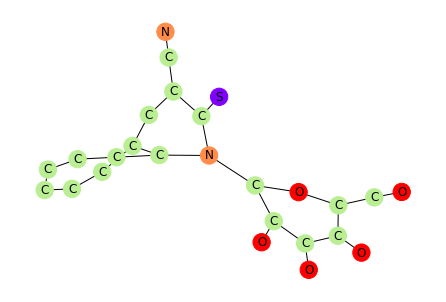

In [60]:
#displaying one sample
plt.clf()
visualize(training_set[8])

# Preprocessing

In [61]:
# lets apply our Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
# lets Tokenize atoms
max_vocab = 500 #maximum vocab is now 500
max_len = 100 #maximum lenth is 100 of tokenized vector


# build vocabulary from training set
all_nodes = [s[0] for s in training_set]
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [62]:
#importing libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
random.seed(0)
#we creatd this function to prepare single batch set
#samples represents the batch of data
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)
    sample_nodes = pad_sequences(sample_nodes, padding='post')
    max_nodes_len = np.shape(sample_nodes)[1]                           #shape: (num of samples, number of nodes)
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]        #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0]                          #make sure all elements are non-zero
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
    
    all_nodes = np.reshape(sample_nodes, -1)      #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)             #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])


#generating batch 
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True: 
        dataset = list(dataset)
        if shuffle: # if shuffle is True
            random.shuffle(dataset) #shuffle() function shuffles randomly
        l = len(dataset) #length of dataset
        for ndx in range(0, l, batch_size): #for loop to create batches
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples
            yield prepare_single_batch(batch_samples) #returning a generator with prepared batches
        if not repeat:
            break #break the loop if no repeat 

In [63]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():
        print(k)
        print(v)
        pass
    print('label', train_batch[1])
    break

data
[ 2  2  2  2  2  3  3  3  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  0  0  0  0  0  0  2  2  3  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  7  7  4  2  2  2
  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  0 35  5  5  2  2  2  2  1  1  1  1  1  1  1  1  1  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
edges
[[  0   5]
 [  1   6]
 [  2  14]
 [  2  24]
 [  3  17]
 [  3  25]
 [  4  18]
 [  4  26]
 [  5   9]
 [  5  10]
 [  6  11]
 [  6  12]
 [  7   9]
 [  7  13]
 [  8  21]
 [  9  11]
 [ 10  12]
 [ 10  15]
 [ 11  21]
 [ 12  16]
 [ 13  19]
 [ 13  20]
 [ 14  17]
 [ 14  18]
 [ 15  22]
 [ 16  23]
 [ 17  19]
 [ 18  20]
 [ 22  23]
 [ 33  40]
 [ 34  41]
 [ 35  38]
 [ 35  39]
 [ 36  37]
 [ 36  39]
 [ 36  41]
 [ 37  38]
 [ 37  40]
 [ 38  43]
 [ 39  42]
 [ 40  44]
 [ 41  45]
 [ 42  46]
 [ 42  48]
 [ 43  47]
 [ 43  49]
 [ 44  50]
 [ 44  52]
 [ 45  51]
 [ 45  53]
 [ 46  54]
 [ 47  55]
 [ 48  56]
 [ 

In [64]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

from tf2_gnn.layers.gnn import GNN, GNNInput

     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 52.6 MB/s 
     |████████████████████████████████| 134 kB 56.6 MB/s 
     |████████████████████████████████| 346 kB 32.7 MB/s 
     |████████████████████████████████| 462 kB 62.1 MB/s 
     |████████████████████████████████| 178 kB 54.0 MB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 3.6 MB 50.2 MB/s 
     |████████████████████████████████| 85 kB 4.1 MB/s 
     |████████████████████████████████| 41 kB 548 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


# The first Aggregation Method 

In [65]:
#importing libraries
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam


In [66]:
data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 #defining the hidden dimension with 32
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumary

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                      

In [67]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [68]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a larg

2530/2530 [==============================] - 61s 22ms/step - loss: 0.6271 - auc: 0.7045 - val_loss: 0.6082 - val_auc: 0.7377
Epoch 2/5
2530/2530 [==============================] - 43s 17ms/step - loss: 0.5976 - auc: 0.7459 - val_loss: 0.6024 - val_auc: 0.7455
Epoch 3/5
2530/2530 [==============================] - 42s 17ms/step - loss: 0.5850 - auc: 0.7615 - val_loss: 0.5935 - val_auc: 0.7711
Epoch 4/5
2530/2530 [==============================] - 40s 16ms/step - loss: 0.5719 - auc: 0.7748 - val_loss: 0.5617 - val_auc: 0.7817
Epoch 5/5
2530/2530 [==============================] - 40s 16ms/step - loss: 0.5633 - auc: 0.7833 - val_loss: 0.5465 - val_auc: 0.7994


In [69]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=16, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [70]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv')

# Trial one
## Expectation:
I expected to get a high accuracy after upsampling my data and setting my hyperparameter to

params["hidden_dim"] = 32  

## Observation 

My model got a score of 0.77102 on kaggle

## Plan


I will change my hyperparameters to :


params["hidden_dim"] = 20 

params["message_calculation_class"] = 'RGCN'

params["num_edge_MLP_hidden_layers"] = 16

# My second Aggregation method

In [74]:
from  tf2_gnn.layers.message_passing import rgat,rgin,rgcn,gnn_film,ggnn,gnn_edge_mlp
import tensorflow as tf
from tensorflow.math import segment_mean #to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model #layers and model
from tensorflow.keras.layers import Embedding, Dense #layers
from tensorflow.keras.optimizers import Adam #optimizer

In [75]:
data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 20 #defining the hidden dimension with 20
params["message_calculation_class"] = 'RGCN'
params["num_edge_MLP_hidden_layers"] = 16
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None,)]            0           []        

In [76]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [78]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 20), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape:0", shape=(None, 20), dtype=float32), dense_shape=Tensor("gradients/rgcn_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor

2530/2530 [==============================] - 68s 22ms/step - loss: 0.6506 - auc: 0.6585 - val_loss: 0.6630 - val_auc: 0.6953
Epoch 2/5
2530/2530 [==============================] - 53s 21ms/step - loss: 0.6309 - auc: 0.6935 - val_loss: 0.6377 - val_auc: 0.7049
Epoch 3/5
2530/2530 [==============================] - 52s 21ms/step - loss: 0.6307 - auc: 0.6992 - val_loss: 0.6231 - val_auc: 0.7154
Epoch 4/5
2530/2530 [==============================] - 53s 21ms/step - loss: 0.6270 - auc: 0.7010 - val_loss: 0.6152 - val_auc: 0.7230
Epoch 5/5
2530/2530 [==============================] - 53s 21ms/step - loss: 0.6266 - auc: 0.7017 - val_loss: 0.6360 - val_auc: 0.6932


In [79]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=20, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [80]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv') #accuracy 0.67511

# Trial two

## Expectation

I expected to get a high accuracy after changing my hyperparameters to :


params["hidden_dim"] = 20

params["message_calculation_class"] = 'RGCN'

params["num_edge_MLP_hidden_layers"] = 16

## Observation

My kaggle acuraccy decreased to 0.67511

## Plan

I will change my hyperparameters to 

params["hidden_dim"] = 20 

params["num_edge_MLP_hidden_layers"] = 16

params["message_calculation_class"] = 'GNN_Edge_MLP'

# My third Aggregation method

In [92]:
from  tf2_gnn.layers.message_passing import RGAT,  MessagePassing, MessagePassingInput

data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 20 #defining the hidden dimension with 20
params["num_edge_MLP_hidden_layers"] = 16
params["message_calculation_class"] = 'GNN_Edge_MLP'
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='gnn_14/StatefulPartitionedCall:0', description="created by layer 'gnn_14'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='tf.math.segment_mean_5/SegmentMean:0', description="created by layer 'tf.math.segment_mean_5'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_43 (InputLayer)          [(None,)]            0           []      

In [93]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [94]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 20), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Reshape:0", shape=(None, 20), dtype=float32), dense_shape=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype

2530/2530 [==============================] - 67s 23ms/step - loss: 0.6569 - auc: 0.6493 - val_loss: 0.6311 - val_auc: 0.6927
Epoch 2/5
2530/2530 [==============================] - 53s 21ms/step - loss: 0.6322 - auc: 0.6909 - val_loss: 0.6164 - val_auc: 0.7117
Epoch 3/5
2530/2530 [==============================] - 52s 21ms/step - loss: 0.6298 - auc: 0.6967 - val_loss: 0.6215 - val_auc: 0.7146
Epoch 4/5
2530/2530 [==============================] - 53s 21ms/step - loss: 0.6262 - auc: 0.7042 - val_loss: 0.6280 - val_auc: 0.7101
Epoch 5/5
2530/2530 [==============================] - 52s 21ms/step - loss: 0.6262 - auc: 0.7013 - val_loss: 0.6287 - val_auc: 0.6983


In [95]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=20, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [97]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv') #0.68497

# Trial three

## Expectation

I expected to get a high accuracy after changing my hyperparameters to :

params["hidden_dim"] = 20 

params["num_edge_MLP_hidden_layers"] = 16

params["message_calculation_class"] = 'GNN_Edge_MLP'

## Observation

My kaggle acuraccy increased to 0.68497

## Plan

I will change my hyperparameters to  :

params["hidden_dim"] = 12 

params["message_calculation_class"] = 'rgat'

params["num_layers"] = 4

params["num_heads"] = 3

# My fourth Aggregation method

In [133]:
from  tf2_gnn.layers.message_passing import RGAT, MessagePassing, MessagePassingInput

data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 12 #defining hidden dimension of the gnn layer
params["message_calculation_class"] = 'rgat'
params["num_layers"] = 4
params["num_heads"] = 3

#params['num_aggr_MLP_hidden_layers'] = 12
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), name='gnn_36/StatefulPartitionedCall:0', description="created by layer 'gnn_36'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), name='tf.math.segment_mean_11/SegmentMean:0', description="created by layer 'tf.math.segment_mean_11'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_11/Sigmoid:0', description="created by layer 'dense_11'")
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_111 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_109 (InputLayer)         [(None,)]            0           [] 

In [109]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [110]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amo

2530/2530 [==============================] - 54s 19ms/step - loss: 0.6337 - auc: 0.6917 - val_loss: 0.6112 - val_auc: 0.7328
Epoch 2/5
2530/2530 [==============================] - 36s 14ms/step - loss: 0.5941 - auc: 0.7469 - val_loss: 0.5774 - val_auc: 0.7627
Epoch 3/5
2530/2530 [==============================] - 36s 14ms/step - loss: 0.5823 - auc: 0.7634 - val_loss: 0.5870 - val_auc: 0.7741
Epoch 4/5
2530/2530 [==============================] - 37s 14ms/step - loss: 0.5701 - auc: 0.7762 - val_loss: 0.5674 - val_auc: 0.7877
Epoch 5/5
2530/2530 [==============================] - 36s 14ms/step - loss: 0.5585 - auc: 0.7879 - val_loss: 0.5475 - val_auc: 0.7987


In [111]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=20, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [113]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv') # 0.79926


# Trial four

## Expectation

I expected to get a higher accuracy after changing my hyperparameters to 


params["hidden_dim"] = 12 

params["message_calculation_class"] = 'rgat'

params["num_layers"] = 4

params["num_heads"] = 3

## Observation

My kaggle acuraccy increased to 0.79926

## Plan

I will change my hyperparameters to 


params["hidden_dim"] = 4 

params["message_calculation_class"] = 'GGNN'

params["num_layers"] =8

params["num_heads"] = 8



# My fifth Aggregation method

In [117]:
from  tf2_gnn.layers.message_passing import RGAT, MessagePassing, MessagePassingInput

data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 4 #defining hidden dimension of the gnn layer
params["message_calculation_class"] = 'GGNN'
params["num_layers"] =8
params["num_heads"] = 8

#params['num_aggr_MLP_hidden_layers'] = 12
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='gnn_28/StatefulPartitionedCall:0', description="created by layer 'gnn_28'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='tf.math.segment_mean_8/SegmentMean:0', description="created by layer 'tf.math.segment_mean_8'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_8/Sigmoid:0', description="created by layer 'dense_8'")
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_87 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_85 (InputLayer)          [(None,)]            0           []        

In [118]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [119]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_7/embedding_lookup_grad/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/ggnn_7/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_6/embedding_lookup_grad/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/ggnn_6/embedding_lookup_grad/Cast:0", sha

2530/2530 [==============================] - 71s 24ms/step - loss: 0.6508 - auc: 0.6578 - val_loss: 0.6289 - val_auc: 0.6952
Epoch 2/5
2530/2530 [==============================] - 47s 19ms/step - loss: 0.6091 - auc: 0.7253 - val_loss: 0.5993 - val_auc: 0.7471
Epoch 3/5
2530/2530 [==============================] - 47s 19ms/step - loss: 0.5878 - auc: 0.7518 - val_loss: 0.5893 - val_auc: 0.7605
Epoch 4/5
2530/2530 [==============================] - 49s 19ms/step - loss: 0.5793 - auc: 0.7617 - val_loss: 0.5671 - val_auc: 0.7762
Epoch 5/5
2530/2530 [==============================] - 48s 19ms/step - loss: 0.5707 - auc: 0.7719 - val_loss: 0.5593 - val_auc: 0.7883


In [120]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=20, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [121]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv') #0.78298

# Trial five

## Expectation

I expected to get a higher accuracy after changing my hyperparameters to 


params["hidden_dim"] = 4 

params["message_calculation_class"] = 'GGNN'

params["num_layers"] =8

params["num_heads"] = 8

## Observation

My kaggle acuraccy decreased to 0.78298

## Plan

I will change my hyperparameters to 


params["hidden_dim"] = 4 

params["message_calculation_class"] = 'RGCN'

params["num_layers"] =3

params["num_heads"] = 11


# My Sixth Trial

In [126]:
from  tf2_gnn.layers.message_passing import RGAT, MessagePassing, MessagePassingInput

data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 4 #defining hidden dimension of the gnn layer
params["message_calculation_class"] = 'RGCN'
params["num_layers"] =3
params["num_heads"] = 11

#params['num_aggr_MLP_hidden_layers'] = 12
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='gnn_33/StatefulPartitionedCall:0', description="created by layer 'gnn_33'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='tf.math.segment_mean_9/SegmentMean:0', description="created by layer 'tf.math.segment_mean_9'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_9/Sigmoid:0', description="created by layer 'dense_9'")
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_102 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_100 (InputLayer)         [(None,)]            0           []        

In [127]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [128]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/rgcn_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_1_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_1_grad/Identity:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/cond_1_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor o

2530/2530 [==============================] - 26s 9ms/step - loss: 0.6414 - auc: 0.6717 - val_loss: 0.6276 - val_auc: 0.6978
Epoch 2/5
2530/2530 [==============================] - 20s 8ms/step - loss: 0.6225 - auc: 0.7016 - val_loss: 0.6230 - val_auc: 0.7016
Epoch 3/5
2530/2530 [==============================] - 21s 8ms/step - loss: 0.6213 - auc: 0.7041 - val_loss: 0.6270 - val_auc: 0.7043
Epoch 4/5
2530/2530 [==============================] - 21s 8ms/step - loss: 0.6205 - auc: 0.7045 - val_loss: 0.6201 - val_auc: 0.7057
Epoch 5/5
2530/2530 [==============================] - 20s 8ms/step - loss: 0.6192 - auc: 0.7066 - val_loss: 0.6249 - val_auc: 0.7072


In [129]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=20, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [130]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv')

# Trial Six

## Expectation

I expected to get a higher accuracy after changing my hyperparameters to 


params["hidden_dim"] = 4 

params["message_calculation_class"] = 'RGCN'

params["num_layers"] =3

params["num_heads"] = 11

## Observation

My kaggle acuraccy dencreased to 0.71536

## Plan

I will change my hyperparameters to 

params["hidden_dim"] = 4 

params["num_layers"] =3

params["num_heads"] = 11

params["num_edge_MLP_hidden_layers"] = 27

params["message_calculation_class"] = 'GNN_Edge_MLP'



# My seventh Trial

In [134]:
from  tf2_gnn.layers.message_passing import RGAT, MessagePassing, MessagePassingInput

data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 4 #defining the hidden dimension with 20
params["num_layers"] =3
params["num_heads"] = 11
params["num_edge_MLP_hidden_layers"] = 27
params["message_calculation_class"] = 'GNN_Edge_MLP'

#params['num_aggr_MLP_hidden_layers'] = 12
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='gnn_37/StatefulPartitionedCall:0', description="created by layer 'gnn_37'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='tf.math.segment_mean_12/SegmentMean:0', description="created by layer 'tf.math.segment_mean_12'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_12/Sigmoid:0', description="created by layer 'dense_12'")
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_114 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_112 (InputLayer)         [(None,)]            0           []   

In [135]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [136]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10, #10 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/gnn__edge_mlp_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_1_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_1_grad/Identity:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/cond_1_grad/Identity_2:0", shape=(2,), dtype=i

2530/2530 [==============================] - 42s 13ms/step - loss: 0.6932 - auc: 0.4992 - val_loss: 0.6933 - val_auc: 0.5000
Epoch 2/10
2530/2530 [==============================] - 32s 13ms/step - loss: 0.6932 - auc: 0.4926 - val_loss: 0.6932 - val_auc: 0.5000
Epoch 3/10
2530/2530 [==============================] - 32s 13ms/step - loss: 0.6932 - auc: 0.4985 - val_loss: 0.6932 - val_auc: 0.5000
Epoch 4/10
2530/2530 [==============================] - 31s 12ms/step - loss: 0.6932 - auc: 0.4976 - val_loss: 0.6931 - val_auc: 0.5000
Epoch 5/10
2530/2530 [==============================] - 32s 12ms/step - loss: 0.6932 - auc: 0.4969 - val_loss: 0.6931 - val_auc: 0.5000
Epoch 6/10
2530/2530 [==============================] - 33s 13ms/step - loss: 0.6932 - auc: 0.5024 - val_loss: 0.6932 - val_auc: 0.5000
Epoch 7/10
2530/2530 [==============================] - 31s 12ms/step - loss: 0.6932 - auc: 0.4996 - val_loss: 0.6931 - val_auc: 0.5000
Epoch 8/10
2530/2530 [==============================] - 41s

In [137]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=50, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [139]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv') #0.50000

# Trial Seven

## Expectation

I expected to get a higher accuracy after changing my hyperparameters to 

params["hidden_dim"] = 4 

params["num_layers"] =3

params["num_heads"] = 11

params["num_edge_MLP_hidden_layers"] = 27

params["message_calculation_class"] = 'GNN_Edge_MLP'

## Observation

My kaggle acuraccy dencreased to 0.50

## Plan

I will change my hyperparameters to 

params["hidden_dim"] = 4 

params["num_heads"] = 50

params["num_edge_MLP_hidden_layers"] = 38

params["message_calculation_class"] = 'GGNN'



# My eighth Trial

In [140]:
from  tf2_gnn.layers.message_passing import RGAT, MessagePassing, MessagePassingInput

data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 4 #defining the hidden dimension with 20
params["num_heads"] = 50
params["num_edge_MLP_hidden_layers"] = 38
params["message_calculation_class"] = 'GGNN'

#params['num_aggr_MLP_hidden_layers'] = 12
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='gnn_38/StatefulPartitionedCall:0', description="created by layer 'gnn_38'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='tf.math.segment_mean_13/SegmentMean:0', description="created by layer 'tf.math.segment_mean_13'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_13/Sigmoid:0', description="created by layer 'dense_13'")
Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_117 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_115 (InputLayer)         [(None,)]            0           []   

In [141]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [142]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_3/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_3/embedding_lookup_grad/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/ggnn_3/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_2/embedding_lookup_grad/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/ggnn_2/embedding_lookup_grad/Cast:0", sha

2530/2530 [==============================] - 80s 24ms/step - loss: 0.6634 - auc: 0.6305 - val_loss: 0.6576 - val_auc: 0.6355
Epoch 2/5
2530/2530 [==============================] - 52s 20ms/step - loss: 0.6566 - auc: 0.6350 - val_loss: 0.6586 - val_auc: 0.6290
Epoch 3/5
2530/2530 [==============================] - 48s 19ms/step - loss: 0.6524 - auc: 0.6380 - val_loss: 0.6550 - val_auc: 0.6367
Epoch 4/5
2530/2530 [==============================] - 49s 19ms/step - loss: 0.6499 - auc: 0.6464 - val_loss: 0.6539 - val_auc: 0.6514
Epoch 5/5
2530/2530 [==============================] - 49s 19ms/step - loss: 0.6473 - auc: 0.6579 - val_loss: 0.6532 - val_auc: 0.6570


In [143]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=50, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [144]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv')


# Trial eight

## Expectation

I expected to get a higher accuracy after changing my hyperparameters to 

params["hidden_dim"] = 4 

params["num_heads"] = 50

params["num_edge_MLP_hidden_layers"] = 38

params["message_calculation_class"] = 'GGNN'



## Observation

My kaggle acuraccy 0.64102




## Plan

I will change my hyperparameters to 

params["hidden_dim"] = 4 

params["num_heads"] = 7

params["num_edge_MLP_hidden_layers"] = 20

params["message_calculation_class"] = 'RGIN'

params['num_aggr_MLP_hidden_layers'] = 12



# My ninth Trial

In [150]:
from  tf2_gnn.layers.message_passing import RGAT, MessagePassing, MessagePassingInput

data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 4 #defining the hidden dimension with 20
params["num_heads"] = 7
params["num_edge_MLP_hidden_layers"] = 20
params["message_calculation_class"] = 'RGIN'
params['num_aggr_MLP_hidden_layers'] = 12
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='gnn_44/StatefulPartitionedCall:0', description="created by layer 'gnn_44'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='tf.math.segment_mean_14/SegmentMean:0', description="created by layer 'tf.math.segment_mean_14'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_14/Sigmoid:0', description="created by layer 'dense_14'")
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_135 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_133 (InputLayer)         [(None,)]            0           []   

In [151]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [152]:
import math #importing math library

batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgin_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgin_2/embedding_lookup_grad/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/rgin_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor o

2530/2530 [==============================] - 59s 18ms/step - loss: 0.6932 - auc: 0.4995 - val_loss: 0.6931 - val_auc: 0.5000
Epoch 2/5
2530/2530 [==============================] - 48s 19ms/step - loss: 0.6932 - auc: 0.4975 - val_loss: 0.6932 - val_auc: 0.5000
Epoch 3/5
2530/2530 [==============================] - 42s 17ms/step - loss: 0.6932 - auc: 0.4973 - val_loss: 0.6932 - val_auc: 0.5000
Epoch 4/5
2530/2530 [==============================] - 45s 18ms/step - loss: 0.6932 - auc: 0.4958 - val_loss: 0.6931 - val_auc: 0.5000
Epoch 5/5
2530/2530 [==============================] - 52s 21ms/step - loss: 0.6932 - auc: 0.4952 - val_loss: 0.6932 - val_auc: 0.5000


In [153]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=50, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [154]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv')

# Trial nine
## Expectation

I expected to get a higher accuracy after changing my hyperparameters to 

params["hidden_dim"] = 4 

params["num_heads"] = 7

params["num_edge_MLP_hidden_layers"] = 20

params["message_calculation_class"] = 'RGIN'

params['num_aggr_MLP_hidden_layers'] = 12




## Observation

My kaggle acuraccy 0.50000




## Plan

I will change my hyperparameters to:

 params["hidden_dim"] = 4 

params["num_heads"] = 25

params['num_aggr_MLP_hidden_layers'] = 12



# My tenth Trial

In [156]:
data = keras.Input(batch_shape=(None,)) # the Input layer for nodes

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) #Input layer for edge 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids
embeded = Embedding(tokenizer.num_words, 20)(data) #embedding layer over data with each token embedded as  size vecto

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1 #this is to calculate number of samples

gnn_input = GNNInput( #gnn_input layer with inputs
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 4 #defining the hidden dimension 
params["num_heads"] = 25
params['num_aggr_MLP_hidden_layers'] = 12
gnn_layer = GNN(params) #gnn layer
gnn_out = gnn_layer(gnn_input) #gnn output layer

print('gnn_out', gnn_out) #printing them

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out, #lets calculate the segmented mean
    segment_ids=node2graph
)
print('mean:', avg) #now printing the mean

#final layer is dense an its activation function is sigmoid

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred) #printing

model = Model( #building model 
    inputs={ #inputs
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred #outputs
)
model.summary() #display model's sumarry

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='gnn_46/StatefulPartitionedCall:0', description="created by layer 'gnn_46'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='tf.math.segment_mean_15/SegmentMean:0', description="created by layer 'tf.math.segment_mean_15'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_15/Sigmoid:0', description="created by layer 'dense_15'")
Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_141 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_139 (InputLayer)         [(None,)]            0           []   

In [157]:
model.compile( #The compilation is performed using one single method call called compile() as it shows
    loss='BinaryCrossentropy', #loss parameter
    metrics=['AUC'] #metrics parameter
)

In [158]:


batch_size = 16 #defining batch size
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit( #fitting the model
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5, #5 epochs
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradients/rgcn_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor o

2530/2530 [==============================] - 30s 10ms/step - loss: 0.6539 - auc: 0.6639 - val_loss: 0.6294 - val_auc: 0.7028
Epoch 2/5
2530/2530 [==============================] - 24s 10ms/step - loss: 0.6201 - auc: 0.7129 - val_loss: 0.6091 - val_auc: 0.7336
Epoch 3/5
2530/2530 [==============================] - 26s 10ms/step - loss: 0.6098 - auc: 0.7276 - val_loss: 0.6039 - val_auc: 0.7419
Epoch 4/5
2530/2530 [==============================] - 21s 8ms/step - loss: 0.6059 - auc: 0.7354 - val_loss: 0.5955 - val_auc: 0.7442
Epoch 5/5
2530/2530 [==============================] - 21s 8ms/step - loss: 0.6016 - auc: 0.7392 - val_loss: 0.5882 - val_auc: 0.7532


In [159]:
y_pred = model.predict( #testing model
    gen_batch(testing_set, batch_size=50, shuffle=False) #batch_size is number of training instances
)
y_pred = np.reshape(y_pred, -1)

In [160]:
import pandas as pd #importung pandad
#generating submission file
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv')

# Trial ten
## Expectation

I expected to get a higher accuracy after changing my hyperparameters to 

params["hidden_dim"] = 4 

params["num_heads"] = 25

params['num_aggr_MLP_hidden_layers'] = 12




## Observation

My kaggle acuraccy 0.74597
